In [26]:
!pip install wordcloud
!pip install plotly
import numpy as np 
import pandas as pd 
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS

plt.rc('figure',figsize=(17,13))
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

[nltk_data] Downloading package vader_lexicon to C:\Users\Nancy
[nltk_data]     Pareta\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
!pip install vaderSentiment
!pip install twython

In [32]:
data=pd.read_csv('C:/Users/Nancy Pareta/Downloads/covidvaccine.csv/covidvaccine.csv')
data['text'].dropna()
data.head()

C:\Users\Nancy Pareta\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.



,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False


In [33]:
data['text']=data['text'].astype(str)
def clean(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    return text
    


data['text'] = data['text'].apply(lambda x:clean(x))
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
scores=[]
for i in range(len(data['text'])):
    
    score = analyser.polarity_scores(data['text'][i])
    score=score['compound']
    scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=(-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data['sentiment']=pd.Series(np.array(sentiment))

In [34]:
data.head()


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid- Vaccine and gi...,['CovidVaccine'],Twitter Web App,False,Positive
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False,Positive
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID- in Affected Countries Rea...,NaN,Twitter Web App,False,Negative
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False,Positive
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False,Neutral


In [35]:
# data.dropna(inplace=True)

# data.head()


(-0.5, 399.5, 199.5, -0.5)

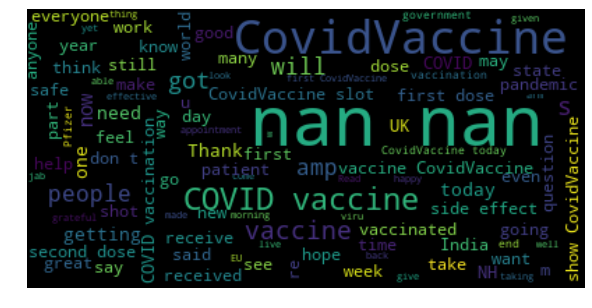

In [36]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

tweet_All = " ".join(review for review in data.text)


fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off')

In [37]:
def clean_text(text):
    
    text = str(text).lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    return text
data['text'] = data['text'].apply(lambda x:clean_text(x))

In [38]:
data['text']

0         australia to manufacture covid vaccine and giv...
1         coronavirusvaccine coronavaccine covidvaccine ...
2         deaths due to covid in affected countries read...
3         teamsubhashree subhashreesotwe iamrajchoco sta...
4         michellegrattan conversationedu this is what p...
5         the multisystem inflammatory syndromechildren ...
6             privilrodrigues  deepkaranahuja     sjanaqa… 
7         msnbc well let’s qualify that would anyone of ...
8         most countries without the ability to make vac...
9         dna zooms up charts in  week hear vaccines epi...
10        biocon executive chairperson kiran mazumdar sh...
11                          it’s over   corona covidvaccine
12        great news pfizers vaccine has entered phase  ...
13        is more dangerous yet to come covidvaccine cor...
14        the whole narrative on the covidvaccine has go...
15        seruminstindia is looking to raise up to  bill...
16            global vaccine tracker vac

In [39]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
df=pd.DataFrame()
df['text']=data['text']
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tokenized'] = df['text'].apply(lambda x: tokenization(x.lower()))
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['No_stopwords'] = df['tokenized'].apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()

def stemming1(text):
    text = [ps.stem(word) for word in text]
    return text

df['stemmed_porter'] = df['No_stopwords'].apply(lambda x: stemming1(x))

from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')
def stemming2(text):
    text = [s_stemmer.stem(word) for word in text]
    return text
df['stemmed_snowball'] = df['No_stopwords'].apply(lambda x: stemming2(x))

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['lemmatized'] = df['No_stopwords'].apply(lambda x: lemmatizer(x))

[nltk_data] Downloading package stopwords to C:\Users\Nancy
[nltk_data]     Pareta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Nancy
[nltk_data]     Pareta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
df.head()


,text,tokenized,No_stopwords,stemmed_porter,stemmed_snowball,lemmatized
0,australia to manufacture covid vaccine and giv...,"[australia, to, manufacture, covid, vaccine, a...","[australia, manufacture, covid, vaccine, give,...","[australia, manufactur, covid, vaccin, give, c...","[australia, manufactur, covid, vaccin, give, c...","[australia, manufacture, covid, vaccine, give,..."
1,coronavirusvaccine coronavaccine covidvaccine ...,"[coronavirusvaccine, coronavaccine, covidvacci...","[coronavirusvaccine, coronavaccine, covidvacci...","[coronavirusvaccin, coronavaccin, covidvaccin,...","[coronavirusvaccin, coronavaccin, covidvaccin,...","[coronavirusvaccine, coronavaccine, covidvacci..."
2,deaths due to covid in affected countries read...,"[deaths, due, to, covid, in, affected, countri...","[deaths, due, covid, affected, countries, read...","[death, due, covid, affect, countri, read, rpi...","[death, due, covid, affect, countri, read, rpi...","[death, due, covid, affected, country, read, r..."
3,teamsubhashree subhashreesotwe iamrajchoco sta...,"[teamsubhashree, subhashreesotwe, iamrajchoco,...","[teamsubhashree, subhashreesotwe, iamrajchoco,...","[teamsubhashre, subhashreesotw, iamrajchoco, s...","[teamsubhashre, subhashreesotw, iamrajchoco, s...","[teamsubhashree, subhashreesotwe, iamrajchoco,..."
4,michellegrattan conversationedu this is what p...,"[michellegrattan, conversationedu, this, is, w...","[michellegrattan, conversationedu, passes, lea...","[michellegrattan, conversationedu, pass, leade...","[michellegrattan, conversationedu, pass, leade...","[michellegrattan, conversationedu, pass, leade..."


In [41]:
data['text']=df['lemmatized']
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,"[australia, manufacture, covid, vaccine, give,...",['CovidVaccine'],Twitter Web App,False,Positive
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,"[coronavirusvaccine, coronavaccine, covidvacci...","['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False,Positive
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,"[death, due, covid, affected, country, read, r...",NaN,Twitter Web App,False,Negative
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,"[teamsubhashree, subhashreesotwe, iamrajchoco,...",NaN,Twitter for Android,False,Positive
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,"[michellegrattan, conversationedu, pass, leade...",NaN,Twitter Web App,False,Neutral


In [42]:
temp = data.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='YlGn')

,sentiment,text
1,Neutral,204664
2,Positive,86499
0,Negative,37456


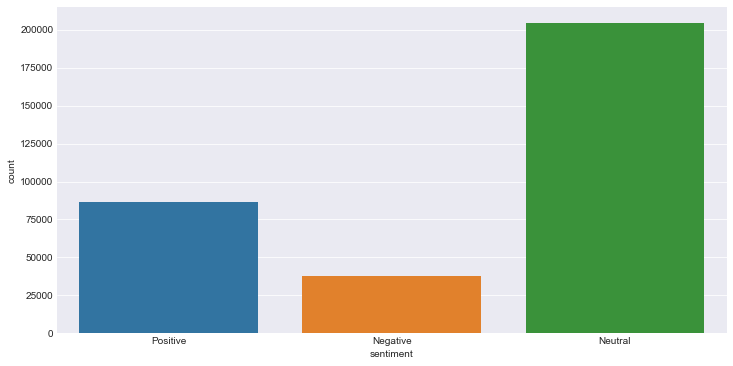

In [43]:

plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=data)
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of covid vaccine Sentiments"}
    ))
fig.show()

In [44]:
all_words=[]
for j in range(len(data['text'])):
    a=data['text'][j]
    for j in a:
        all_words.append(j)
all_words=pd.Series(np.array(all_words))

common_words=all_words.value_counts()[:30].rename_axis('Common Words').reset_index(name='count')

fig = px.treemap(common_words, path=['Common Words'], values='count',title='30 Most Common Words In covid vaccine Tweets')
fig.show()

In [45]:
data['hashtags']=data['hashtags'].fillna('[]')
all_hashtags=[]
for i in range(len(data['hashtags'])):
    a=data['hashtags'][i].strip('][').split(', ') 
    for i in a:
        all_hashtags.append(i)
all_hashtags=['No Hashtag' if x=='' else x for x in all_hashtags]       

all_hashtags=pd.Series(np.array(all_hashtags))
print('There are {} instances of tweets in which No Hashtags were used'.format(all_hashtags.value_counts()[1]))

common_hashtags=all_hashtags.value_counts().drop(labels='No Hashtag')[:30].rename_axis('Common Hashtags').reset_index(name='count')
fig = px.treemap(common_hashtags, path=['Common Hashtags'], values='count',title='30 Most Common Hashtags')
fig.show()

There are 76745 instances of tweets in which No Hashtags were used


In [46]:
Positive_tweet = data[data['sentiment']=='Positive'].reset_index()
Negative_tweet = data[data['sentiment']=='Negative'].reset_index()
Neutral_tweet = data[data['sentiment']=='Neutral'].reset_index()

In [47]:
all_positive_words=[]
all_positive_hashtags=[]
for i in range(len(Positive_tweet['text'])):
    a=Positive_tweet['text'][i]
    b=Positive_tweet['hashtags'][i].strip('][').split(', ')
    for i in a:
        all_positive_words.append(i)
    for i in b:
        all_positive_hashtags.append(i)
all_positive_words=pd.Series(np.array(all_positive_words))
all_positive_hashtags=pd.Series(np.array(all_positive_hashtags))
common_words=all_positive_words.value_counts().drop(labels='')[:70].rename_axis('Common Positive Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Positive Words'], values='count',title='70 Most Common Words In Positive Tweets')
fig.show()
common_hashtags=all_positive_hashtags.value_counts()[:70].drop(labels='').rename_axis('Common Positive Hashtags').reset_index(name='count')
fig = px.treemap(common_hashtags, path=['Common Positive Hashtags'], values='count',title='70 Most Common Hashtags In Positive Tweets')
fig.show()

In [50]:
all_negative_words=[]
all_negative_hashtags=[]
for i in range(len(Negative_tweet['text'])):
    a=Negative_tweet['text'][i]
    b=Negative_tweet['hashtags'][i].strip('][').split(', ')
    for i in a:
        all_negative_words.append(i)
    for i in b:
        all_negative_hashtags.append(i)
all_negative_words=pd.Series(np.array(all_negative_words))
all_negative_hashtags=pd.Series(np.array(all_negative_hashtags))
common_words=all_negative_words.value_counts().drop(labels='')[:70].rename_axis('Common Negative Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Negative Words'], values='count',title='70 Most Common Words In Negative Tweets')
fig.show()
common_hashtags=all_negative_hashtags.value_counts()[:70].drop(labels='').rename_axis('Common Negative Hashtags').reset_index(name='count')
fig = px.treemap(common_hashtags, path=['Common Negative Hashtags'], values='count',title='70 Most Common Hashtags In Negative Tweets')
fig.show()



In [51]:
data_ = data['source'].value_counts().reset_index()

trace1 = go.Bar(
                x = ['Twitter for Android', 'Twitter Web App', 'Twitter for iPhone',
       'TweetDeck', 'Buffer', 'Twitter for iPad', 'Twitter Media Studio',
       'ThreadReaderApp', 'Instagram', 'SocialFlow', 'Hootsuite Inc.',
       'LinkedIn', 'Twitter for Mac', '24liveblog', 'Publer ', 'IFTTT',
       'Socialbakers', 'Falcon Social Media Management ', 'Echobox',
       'Microsoft Power Platform', 'Nonli', 'Sendible',
       'Tweetbot for Mac', 'EastMojo',
       'Twitter Media Studio - LiveCut'], #temp_df['index'],
                y = data_['source'],
                marker = dict(color = 'rgb(250,13,92)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=data_['source'], textposition='outside')
layout = go.Layout(template= "plotly_dark",title = 'SOURCE DISTRIBUTION OF TWEETS' , xaxis = dict(title = 'SOURCE'), yaxis = dict(title = 'Count'), height=650)
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [52]:
data_verified=data[(data['user_verified']==True)].reset_index()
data_not_verified=data[(data['user_verified']==False)].reset_index()

In [53]:
data_ = data_verified['source'].value_counts().reset_index()

trace1 = go.Bar(
                x = ['Twitter Web App', 'Twitter for iPhone', 'TweetDeck', 'Buffer',
       'SocialFlow', 'Hootsuite Inc.', 'Twitter for iPad',
       'Twitter for Android', 'Socialbakers', 'Echobox',
       'Twitter Media Studio', 'EastMojo',
       'Twitter Media Studio - LiveCut', 'GT_Backend'], #temp_df['index'],
                y = data_['source'],
                marker = dict(color = 'rgb(250,13,92)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=data_['source'], textposition='outside')
layout = go.Layout(template= "plotly_dark",title = 'SOURCE DISTRIBUTION OF TWEETS FROM VERIFIED ACCOUNTS' , xaxis = dict(title = 'SOURCE'), yaxis = dict(title = 'Count'), height=650)
fig = go.Figure(data = [trace1], layout = layout)
fig.show()


In [54]:
data['user_location'] = data['user_location'].fillna('NaN')
Positive_tweet = data[data['sentiment']=='Positive'].reset_index()
Negative_tweet = data[data['sentiment']=='Negative'].reset_index()
Neutral_tweet = data[data['sentiment']=='Neutral'].reset_index()
pos_location=Positive_tweet['user_location']
neg_location=Negative_tweet['user_location']
neu_location=Neutral_tweet['user_location']

common=set(pos_location).intersection(set(neg_location)).intersection(set(neu_location))
common_list=list(common)

common_words=neg_location.value_counts().drop(labels=common_list)[:10].rename_axis('Common Negative Locations').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Negative Locations'], values='count',title='10 Top Unique Negative Tweets Locations')
fig.show()
common_words=pos_location.value_counts().drop(labels=common_list)[:10].rename_axis('Common Positive Locations').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Positive Locations'], values='count',title='10 Top Unique Positive Tweets Locations')
fig.show()
common_words=neu_location.value_counts().drop(labels=common_list)[:10].rename_axis('Common Neutral Locations').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Neutral Locations'], values='count',title='10 Top Unique Neutral Tweets Locations')
fig.show()


In [55]:
from matplotlib import rcParams

C:\Users\Nancy Pareta\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



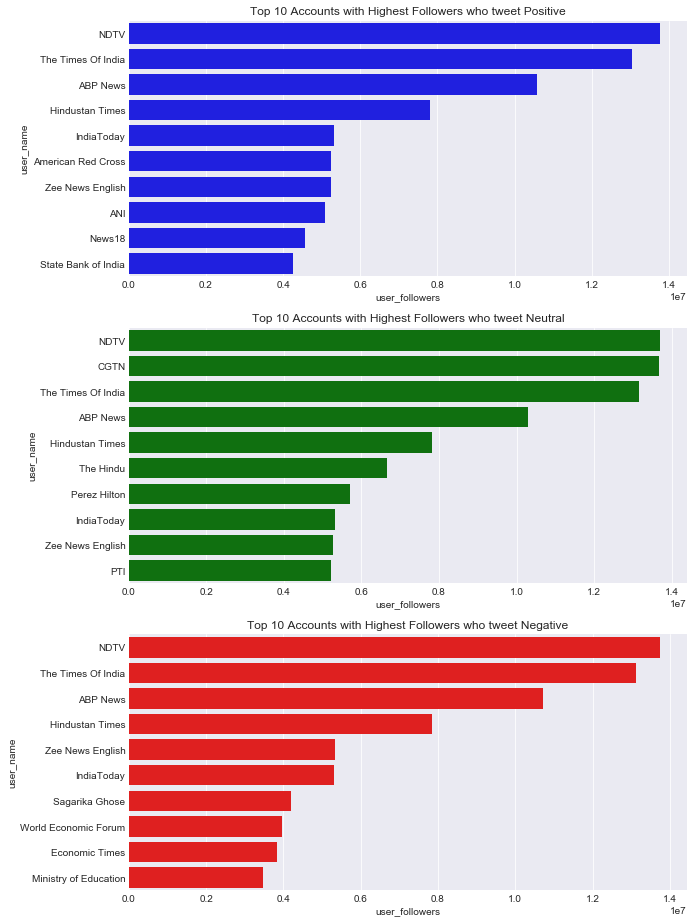

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 16))
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax1, palette=["b"],
           data=data[(data.sentiment== "Positive")]\
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax1.set_title('Top 10 Accounts with Highest Followers who tweet Positive')
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax2, palette=["g"],
           data=data[(data.sentiment == "Neutral")]
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax2.set_title('Top 10 Accounts with Highest Followers who tweet Neutral')
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax3, palette=["r"],
           data=data[(data.sentiment == "Negative")]
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax3.set_title('Top 10 Accounts with Highest Followers who tweet Negative')

fig.show()